# VGG16 – Convolutional Network for Classification and Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

- VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

![](https://neurohive.io/wp-content/uploads/2018/11/vgg16.png)

- Importing library

In [1]:
from keras.layers import Input, Dense, Flatten
from keras import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
import pandas as pd

As we are using VGG16 architecture, it expects the size of 224 by 224. We will set image size.

In [2]:
image_size = [224, 224]

In [3]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

The first argument is the shape of input image plus **3**(as image is colured[RBG], for black_and_white add **1**).
The second one is the weights eqaul to imagenet. And,
as we know it gives 1000 outputs. Third one excludes the top layer.

In [4]:
for layer in vgg.layers:
    layer.trainable = False

Some of the layers of VGG16 are already trained. To train them again is not a good practice. Thereby making it False

In [11]:
from glob import glob
folders = glob('C://Users//Shehryar//Desktop//PlantVillage//train//*')

In [12]:
folders

['C://Users//Shehryar//Desktop//PlantVillage//train\\Pepper__bell___Bacterial_spot',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Pepper__bell___healthy',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Potato___Early_blight',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Potato___healthy',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Potato___Late_blight',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Tomato_aphid',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Tomato_Bacterial_spot',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Tomato_caterpillar',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Tomato_Early_blight',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Tomato_healthy',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Tomato_Late_blight',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Tomato_Leaf_Mold',
 'C://Users//Shehryar//Desktop//PlantVillage//train\\Tomato_Magnesium_Deficiency',
 'C://Users//Shehry

Flattening the output layer

In [13]:
x = Flatten()(vgg.output)

In [14]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [15]:
model = Model(inputs = vgg.input, outputs = prediction)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Compiling the model

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Generating more images

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [21]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [23]:
train_set = train_data_gen.flow_from_directory('C://Users//shehryar//Desktop//PlantVillage//train//', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 19817 images belonging to 24 classes.


In [24]:
test_set = test_data_gen.flow_from_directory('C://Users//shehryar//Desktop//PlantVillage//test//', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 2070 images belonging to 24 classes.


Plotting few images

Text(0.5, 1.0, 'Pest Spot')

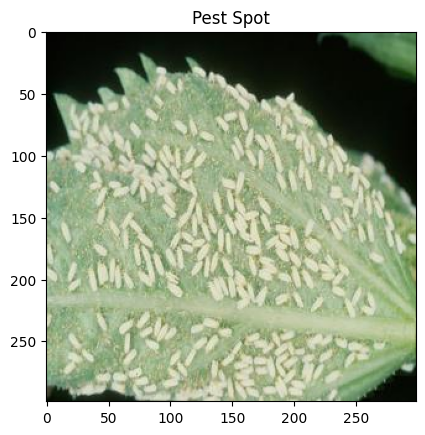

In [44]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("C://Users//shehryar//Desktop//PlantVillage//train//Tomato_whiteflies/BA (10).jpg"))
plt.title("Pest Spot")

Text(0.5, 1.0, 'Tomato Nitrogen Deficiency')

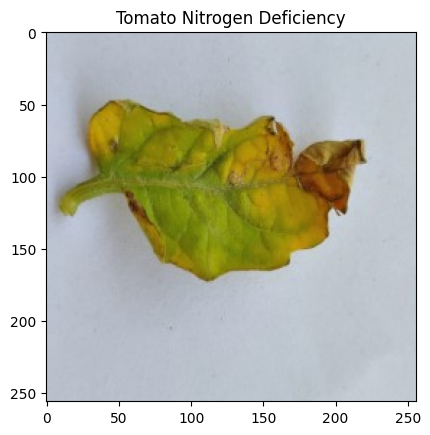

In [45]:
plt.imshow(plt.imread("C://Users//shehryar//Desktop//PlantVillage//train//Tomato_Nitrogen_Deficiency/IMG20220323180110_5.jpg"))
plt.title("Tomato Nitrogen Deficiency")


Text(0.5, 1.0, 'Potato Healthy')

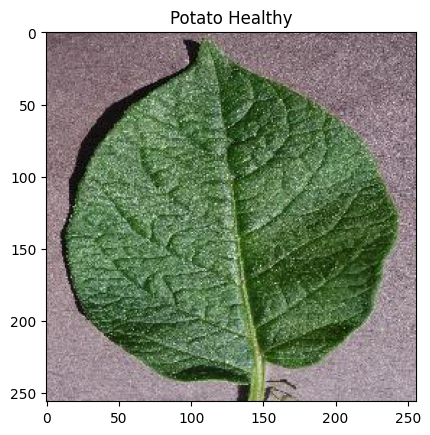

In [43]:
plt.imshow(plt.imread("C://Users//shehryar//Desktop//PlantVillage//train//Potato___healthy/046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG"))
plt.title("Potato Healthy")

Text(0.5, 1.0, 'Potato Early Blight')

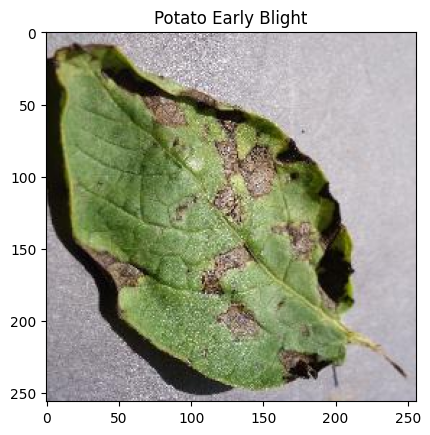

In [42]:
plt.imshow(plt.imread("C://Users//shehryar//Desktop//PlantVillage//train//Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG"))
plt.title("Potato Early Blight")
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/Tomato leaf disease detection/Late Blight.png')

In [29]:
import tensorflow as tf
from keras.models import model_from_json
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint
import numpy as np
from matplotlib import pyplot as plt

Fitting the model

In [31]:
checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint.h5',
    save_weights_only=True,
    save_best_only=False,
    save_freq='epoch'  # Save checkpoint every epoch
)
mod = model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set),
  callbacks=[checkpoint_callback]
)



Epoch 1/10
620/620 [==============================] - 4385s 7s/step - loss: 0.8656 - accuracy: 0.7522 - val_loss: 0.9988 - val_accuracy: 0.7459
Epoch 2/10
620/620 [==============================] - 3517s 6s/step - loss: 0.4777 - accuracy: 0.8554 - val_loss: 0.7994 - val_accuracy: 0.8324
Epoch 3/10
620/620 [==============================] - 3408s 5s/step - loss: 0.3808 - accuracy: 0.8832 - val_loss: 0.7760 - val_accuracy: 0.8198
Epoch 4/10
620/620 [==============================] - 4476s 7s/step - loss: 0.3498 - accuracy: 0.8944 - val_loss: 0.7077 - val_accuracy: 0.8551
Epoch 5/10
620/620 [==============================] - 3722s 6s/step - loss: 0.2899 - accuracy: 0.9113 - val_loss: 0.6525 - val_accuracy: 0.8623
Epoch 6/10
620/620 [==============================] - 3605s 6s/step - loss: 0.2968 - accuracy: 0.9148 - val_loss: 0.9405 - val_accuracy: 0.8266
Epoch 7/10
620/620 [==============================] - 4797s 8s/step - loss: 0.2502 - accuracy: 0.9250 - val_loss: 0.8131 - val_accuracy:

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PlantVillage/vgg16_custom.json'

In [32]:
model_json = model.to_json()
with open("C://Users//shehryar//Desktop//PlantVillage//vgg16_custom.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights("C://Users//shehryar//Desktop//PlantVillage//vgg16_custom_weights.h5")

print("Model and weights saved to disk")

Model and weights saved to disk


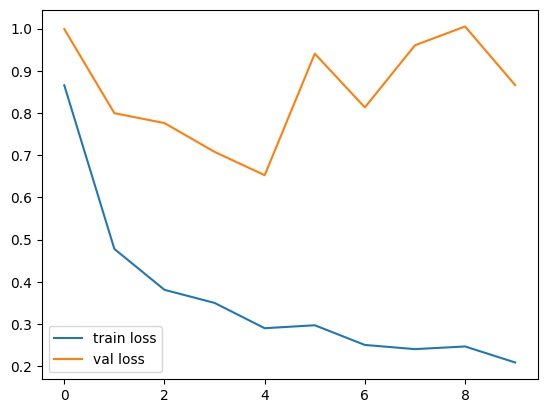

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('C://Users//shehryar//Desktop//PlantVillage//train loss or val loss.png')

In [35]:
train_dir = "C://Users//shehryar//Desktop//PlantVillage//train"

In [36]:
import os
class_names = sorted(os.listdir(train_dir))
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Magnesium_Deficiency',
 'Tomato_Nitrogen_Deficiency',
 'Tomato_Potassium_Deficiency',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_aphid',
 'Tomato_caterpillar',
 'Tomato_healthy',
 'Tomato_melonFruitfly',
 'Tomato_spidermite',
 'Tomato_thrips',
 'Tomato_whiteflies']

In [39]:
import tensorflow as tf
from IPython.display import clear_output as cls
def predictImages(data, class_names, model):

    r, c = 3, 4
    imgLen = r*c
    plt.figure(figsize=(20, 15))
    i = 1

    for images, labels in iter(data):

        id = np.random.randint(len(images))
        img = tf.expand_dims(images[id], axis=0)

        plt.subplot(r, c, i)
        plt.imshow(img[0])

        predicted = model.predict(img)
        predicted = class_names[np.argmax(predicted)]
        actual = class_names[np.argmax(labels[id])]

        plt.title(f"Actual: {actual}\nPredicted: {predicted}")
        plt.axis('off')
        cls()

        i+=1
        if i > imgLen:
            break

    plt.show()
    plt.savefig('C://Users//shehryar//Desktop//PlantVillage/predicted image.png')



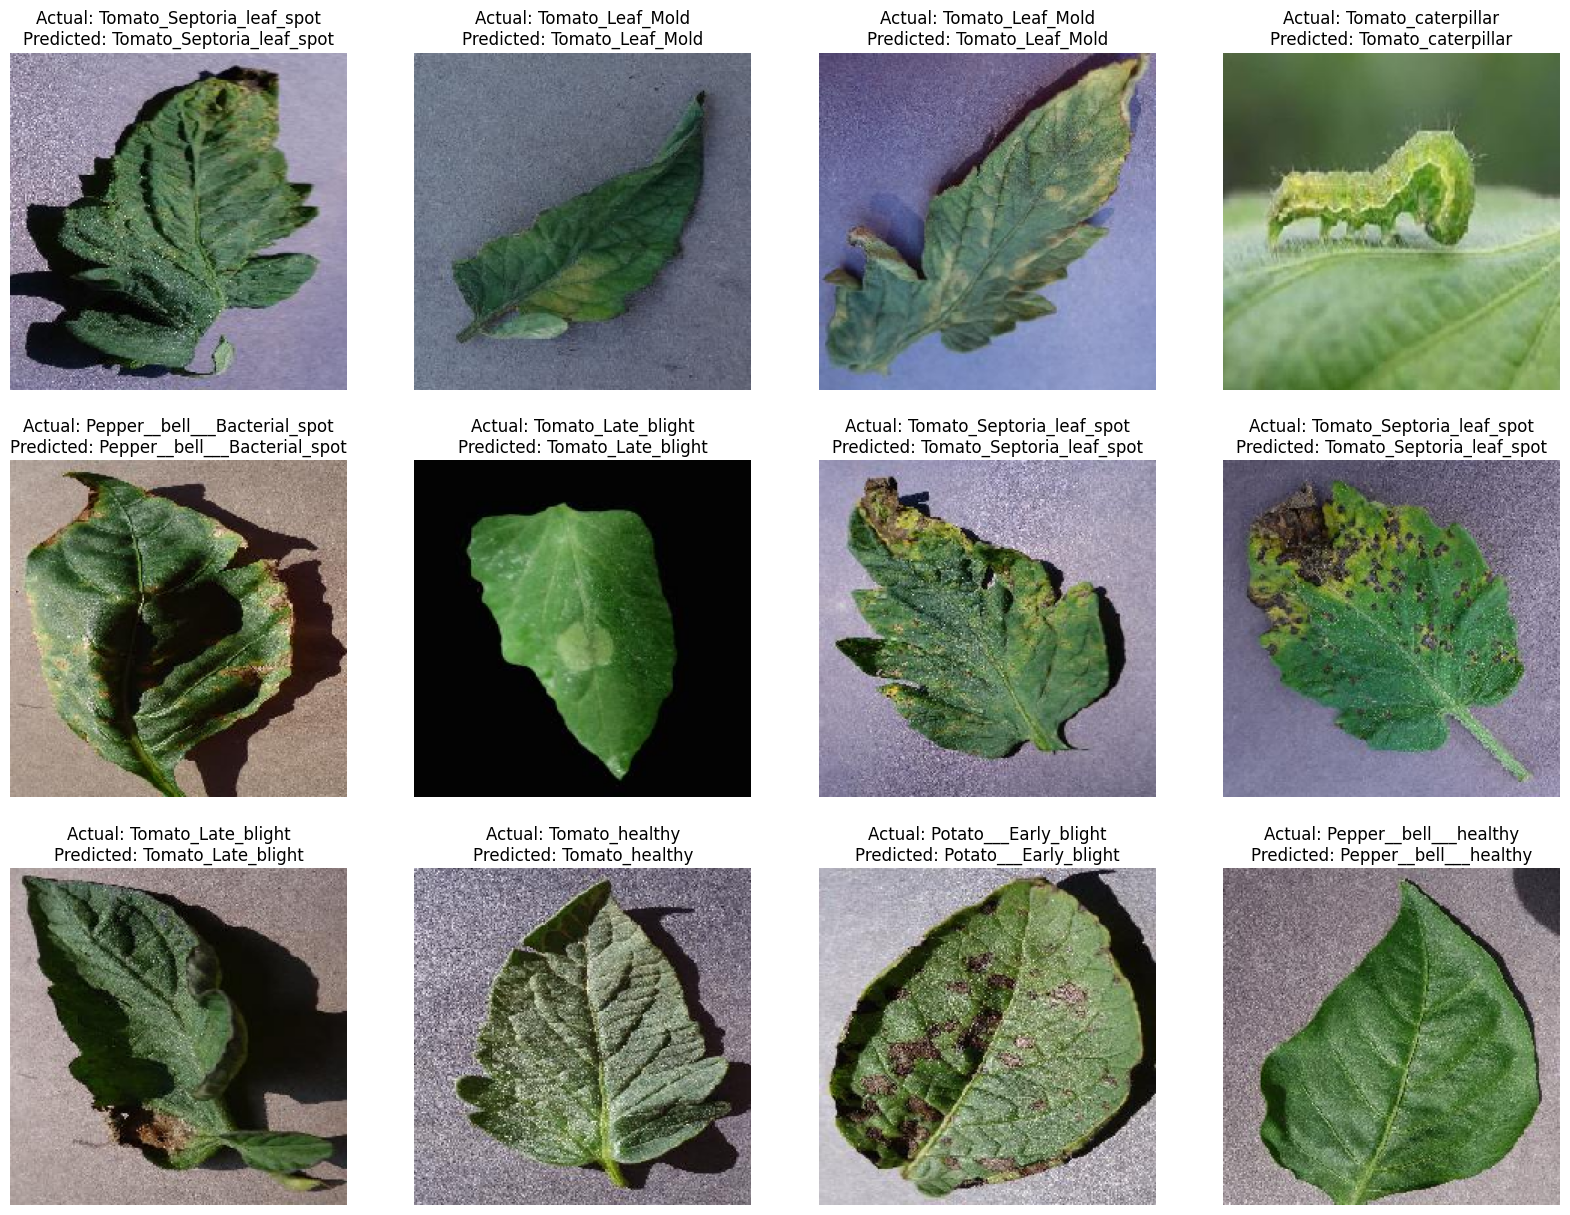

<Figure size 640x480 with 0 Axes>

In [40]:
predictImages(test_set, class_names, model)

1/1 [==============================] - 1s 574ms/step
predicted class:  Potato___healthy
Predicted class: [4]


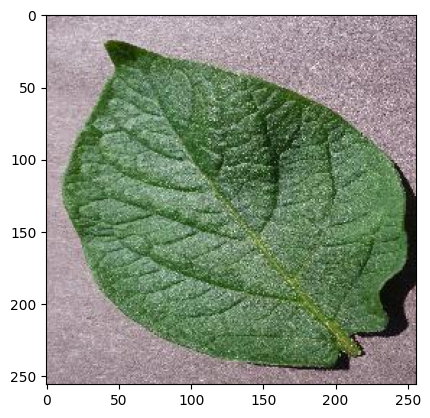

In [41]:
# Load the model architecture from JSON
with open('C://Users//shehryar//Desktop//PlantVillage/vgg16_custom.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)

# Load the model weights
model.load_weights('C://Users//shehryar//Desktop//PlantVillage//vgg16_custom_weights.h5')

# Compile the model (necessary if you want to further train the model or evaluate it)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Load and preprocess the image
image_path = 'C://Users//shehryar//Desktop//PlantVillage//test//Potato___healthy//e51367c1-d582-45e3-acf6-b0e652b43d3a___RS_HL 1873.JPG'
preprocessed_image = preprocess_image(image_path)

# Predict the class
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
a=predicted_class[0]
predicted = class_names[a]


print("predicted class: ",predicted)

print(f"Predicted class: {predicted_class}")
plt.imshow(plt.imread('C://Users//shehryar//Desktop//PlantVillage//test//Potato___healthy//e51367c1-d582-45e3-acf6-b0e652b43d3a___RS_HL 1873.JPG'))